In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Data Cleaning

In [4]:
invest_key = pd.read_excel('../raw_data/invest_profile_keywords.xlsx')

In [5]:
invest_key.head()

Unnamed: 0  id               name description  short_description  \
0           0   1  Greencoat Capital         NaN                NaN   
1           1   1  Greencoat Capital         NaN                NaN   
2           2   1  Greencoat Capital         NaN                NaN   
3           3   1  Greencoat Capital         NaN                NaN   
4           4   1  Greencoat Capital         NaN                NaN   

   products_description  company_category_id  number_of_employees  ebit  \
0                   NaN                    1                  NaN   NaN   
1                   NaN                    1                  NaN   NaN   
2                   NaN                    1                  NaN   NaN   
3                   NaN                    1                  NaN   NaN   
4                   NaN                    1                  NaN   NaN   

   ebitda  ...        created_at.2        updated_at.2 deleted_at.2  \
0     NaN  ... 2021-10-19 17:04:17 2021-10-19 17:04:17          NaN   
1     NaN  ... 2021-10-19 17:04:17 2021-10-19 17:04:17          NaN   
2     NaN  ... 2021-10-19 17:04:17 2021-10-19 17:04:17          NaN   
3     NaN  ... 2021-10-19 17:04:17 2021-10-19 17:04:17          NaN   
4     NaN  ... 2021-10-19 17:04:17 2021-10-19 17:04:17          NaN   

   is_deleted.2    id.3               name_de        created_at.3  \
0           0.0     3.0               energie 2021-10-14 13:47:07   
1           0.0   196.0               heating 2021-10-14 13:48:18   
2           0.0   470.0                   led 2021-10-14 13:51:02   
3           0.0  1843.0  erneuerbare energien 2021-10-14 14:10:13   
4           0.0  3994.0    wärmerückgewinnung 2021-10-14 15:15:28   

         updated_at.3  deleted_at.3  is_deleted.3  
0 2021-10-14 13:47:07           NaN           0.0  
1 2021-10-14 13:48:18           NaN           0.0  
2 2021-10-14 13:51:02           NaN           0.0  
3 2021-10-14 14:10:13           NaN           0.0  
4 2021-10-14 15:15:28           NaN           0.0  

[5 rows x 70 columns]

In [6]:
invest_sec = pd.read_excel('../raw_data/invest_profile_sectors_subsectors.xlsx')
invest_sec.head()

Unnamed: 0  id               name description  short_description  \
0           0   1  Greencoat Capital         NaN                NaN   
1           1   1  Greencoat Capital         NaN                NaN   
2           2   1  Greencoat Capital         NaN                NaN   
3           3   5       Daniel Vogel         NaN                NaN   
4           4   5       Daniel Vogel         NaN                NaN   

   products_description  company_category_id  number_of_employees  ebit  \
0                   NaN                    1                  NaN   NaN   
1                   NaN                    1                  NaN   NaN   
2                   NaN                    1                  NaN   NaN   
3                   NaN                    1                  NaN   NaN   
4                   NaN                    1                  NaN   NaN   

   ebitda  ...  subsector_id  is_excluded.1        created_at.3  \
0     NaN  ...          10.0            0.0 2021-10-14 13:47:03   
1     NaN  ...          77.0            0.0 2021-10-14 13:47:03   
2     NaN  ...         134.0            0.0 2021-10-14 13:47:03   
3     NaN  ...           NaN            NaN                 NaT   
4     NaN  ...         199.0            0.0 2021-10-14 13:47:15   

         updated_at.3  deleted_at.3 is_deleted.3   id.5  sector_id.1  \
0 2021-10-14 13:47:03           NaN          0.0   10.0          1.0   
1 2021-10-14 13:47:03           NaN          0.0   77.0          9.0   
2 2021-10-14 13:47:03           NaN          0.0  134.0         17.0   
3                 NaT           NaN          NaN    NaN          NaN   
4 2021-10-14 13:47:15           NaN          0.0  199.0         27.0   

                                  name_en.1  \
0                            Energy storage   
1  Ventilation / Heating / Air conditioning   
2                     Electrical appliances   
3                                       NaN   
4                             IT Consulting   

                              name_de.1  
0                    Energiespeicherung  
1             Heizung / Klima / Lüftung  
2  Computer und Elektronik Einzelhandel  
3                                   NaN  
4                           IT-Beratung  

[5 rows x 80 columns]

In [12]:
key_names = invest_key['name'].unique().tolist()
sec_names = invest_sec['name'].unique().tolist()
len(sec_names), len(key_names)

(4949, 4949)

In [22]:
invest_key.isna().sum()/len(invest_key['name'])

Unnamed: 0           0.000000
id                   0.000000
name                 0.000000
description          0.980211
short_description    1.000000
                       ...   
name_de              0.081838
created_at.3         0.081838
updated_at.3         0.081838
deleted_at.3         1.000000
is_deleted.3         0.081838
Length: 70, dtype: float64

In [26]:
invest_key_small = invest_key[['name','name_de']]

In [29]:
invest_key_small

name               name_de
0                Greencoat Capital               energie
1                Greencoat Capital               heating
2                Greencoat Capital                   led
3                Greencoat Capital  erneuerbare energien
4                Greencoat Capital    wärmerückgewinnung
...                            ...                   ...
21623            Jan Forbriger MBI           hospitality
21624  Ing. Karl Lais Holzbau GmbH            gewerbebau
21625  Ing. Karl Lais Holzbau GmbH               hausbau
21626  Ing. Karl Lais Holzbau GmbH                neubau
21627  Ing. Karl Lais Holzbau GmbH                  holz

[21628 rows x 2 columns]

In [30]:
invest_key_small['name'].nunique()

4949

In [55]:
invest_key_concat = invest_key_small.astype(str).groupby('name').agg({'name_de':' '.join})
invest_key_concat.head()

name_de
name                                                                                
 Michael Grabner Media Ges.m.b.H.                                                nan
10X group                                 start-ups app big data internet agnostisch
123 Investment Managers            tourismus altenpflege gastronomie labor senior...
137 Ventures                                                              agnostisch
138 Pyramids                                                              agnostisch

In [54]:
invest_sec.isna().sum()/len(invest_sec['name'])

Unnamed: 0           0.000000
id                   0.000000
name                 0.000000
description          0.983205
short_description    1.000000
                       ...   
is_deleted.3         0.458590
id.5                 0.458590
sector_id.1          0.458590
name_en.1            0.458590
name_de.1            0.458590
Length: 80, dtype: float64

In [155]:
invest_sec_small = invest_sec[['name','name_de.1']]
invest_sec_concat = invest_sec_small.astype(str).groupby('name').agg({'name_de.1':' '.join})
invest_sec_concat

name_de.1
name                                                                                         
 Michael Grabner Media Ges.m.b.H.           Verlagswesen Internet Handel Portale Suchmasch...
10X group                                          Software-Entwicklung nan Datenverarbeitung
123 Investment Managers                     Freizeit Produkte Restaurants Bildungs- und Au...
137 Ventures                                                                              nan
138 Pyramids                                                                              nan
...                                                                                       ...
yabeo Capital GmbH                          Erneuerbare Energie - sonstige Umwelt und Recy...
zfhn Zukunftsfonds Heilbronn GmbH & Co. KG        Machine Vision Systeme Umwelt und Recycling
zur Mühlen ApS & Co. KG                     Fleisch, Geflügel und Fisch Verpackte Lebensmi...
zwei.7 Equity GmbH                                            nan nan nan nan nan nan nan nan
zwei.7 Holding GmbH                                                           nan nan nan nan

[4949 rows x 1 columns]

In [156]:
invest_key_sec = invest_key_concat.merge(invest_sec_concat, how='inner', on='name')

In [157]:
invest_key_sec.head()

name_de  \
name                                                                                   
 Michael Grabner Media Ges.m.b.H.                                                nan   
10X group                                 start-ups app big data internet agnostisch   
123 Investment Managers            tourismus altenpflege gastronomie labor senior...   
137 Ventures                                                              agnostisch   
138 Pyramids                                                              agnostisch   

                                                                           name_de.1  
name                                                                                  
 Michael Grabner Media Ges.m.b.H.  Verlagswesen Internet Handel Portale Suchmasch...  
10X group                                 Software-Entwicklung nan Datenverarbeitung  
123 Investment Managers            Freizeit Produkte Restaurants Bildungs- und Au...  
137 Ventures                                                                     nan  
138 Pyramids                                                                     nan

In [158]:
invest_key_sec.describe()

name_de name_de.1
count     4949      4949
unique    2233      1555
top        nan       nan
freq      1754      2608

In [160]:
invest_key_sec['name_comb'] = invest_key_sec[['name_de','name_de.1']].agg(' '.join, axis=1)

In [161]:
invest_key_sec

name_de  \
name                                                                                            
 Michael Grabner Media Ges.m.b.H.                                                         nan   
10X group                                          start-ups app big data internet agnostisch   
123 Investment Managers                     tourismus altenpflege gastronomie labor senior...   
137 Ventures                                                                       agnostisch   
138 Pyramids                                                                       agnostisch   
...                                                                                       ...   
yabeo Capital GmbH                          medien software fintech pharma erneuerbare ene...   
zfhn Zukunftsfonds Heilbronn GmbH & Co. KG  recycling iot industrie 4.0 new materials mach...   
zur Mühlen ApS & Co. KG                             fleisch metzgerei lebensmittel & getränke   
zwei.7 Equity GmbH                                                                        nan   
zwei.7 Holding GmbH                         e-commerce immobilien healthcare erneuerbare e...   

                                                                                    name_de.1  \
name                                                                                            
 Michael Grabner Media Ges.m.b.H.           Verlagswesen Internet Handel Portale Suchmasch...   
10X group                                          Software-Entwicklung nan Datenverarbeitung   
123 Investment Managers                     Freizeit Produkte Restaurants Bildungs- und Au...   
137 Ventures                                                                              nan   
138 Pyramids                                                                              nan   
...                                                                                       ...   
yabeo Capital GmbH                          Erneuerbare Energie - sonstige Umwelt und Recy...   
zfhn Zukunftsfonds Heilbronn GmbH & Co. KG        Machine Vision Systeme Umwelt und Recycling   
zur Mühlen ApS & Co. KG                     Fleisch, Geflügel und Fisch Verpackte Lebensmi...   
zwei.7 Equity GmbH                                            nan nan nan nan nan nan nan nan   
zwei.7 Holding GmbH                                                           nan nan nan nan   

                                                                                    name_comb  
name                                                                                           
 Michael Grabner Media Ges.m.b.H.           nan Verlagswesen Internet Handel Portale Suchm...  
10X group                                   start-ups app big data internet agnostisch Sof...  
123 Investment Managers                     tourismus altenpflege gastronomie labor senior...  
137 Ventures                                                                   agnostisch nan  
138 Pyramids                                                                   agnostisch nan  
...                                                                                       ...  
yabeo Capital GmbH                          medien software fintech pharma erneuerbare ene...  
zfhn Zukunftsfonds Heilbronn GmbH & Co. KG  recycling iot industrie 4.0 new materials mach...  
zur Mühlen ApS & Co. KG                     fleisch metzgerei lebensmittel & getränke Flei...  
zwei.7 Equity GmbH                                        nan nan nan nan nan nan nan nan nan  
zwei.7 Holding GmbH                         e-commerce immobilien healthcare erneuerbare e...  

[4949 rows x 3 columns]

In [162]:
invest_key_sec1 = invest_key_sec['name_comb'].str.replace('nan','').reset_index()

In [163]:
invest_key_sec1

name  \
0               Michael Grabner Media Ges.m.b.H.   
1                                      10X group   
2                        123 Investment Managers   
3                                   137 Ventures   
4                                   138 Pyramids   
...                                          ...   
4944                          yabeo Capital GmbH   
4945  zfhn Zukunftsfonds Heilbronn GmbH & Co. KG   
4946                     zur Mühlen ApS & Co. KG   
4947                          zwei.7 Equity GmbH   
4948                         zwei.7 Holding GmbH   

                                              name_comb  
0      Verlagswesen Internet Handel Portale Suchmasc...  
1     start-ups app big data internet agnostisch Sof...  
2     tourismus altenpflege gastronomie labor senior...  
3                                           agnostisch   
4                                           agnostisch   
...                                                 ...  
4944  medien software fintech pharma erneuerbare ene...  
4945  recycling iot industrie 4.0 new materials mach...  
4946  fleisch metzgerei lebensmittel & getränke Flei...  
4947                                                     
4948  e-commerce immobilien healthcare erneuerbare e...  

[4949 rows x 2 columns]

In [164]:
invest_key_sec1['name_comb'].replace(r'^\s*$',np.nan,regex=True,inplace=True)

In [165]:
invest_key_sec2 = invest_key_sec1.dropna().reset_index()

In [166]:
invest_key_sec2

index                                        name  \
0         0            Michael Grabner Media Ges.m.b.H.   
1         1                                   10X group   
2         2                     123 Investment Managers   
3         3                                137 Ventures   
4         4                                138 Pyramids   
...     ...                                         ...   
3225   4941                        winelike invest GmbH   
3226   4944                          yabeo Capital GmbH   
3227   4945  zfhn Zukunftsfonds Heilbronn GmbH & Co. KG   
3228   4946                     zur Mühlen ApS & Co. KG   
3229   4948                         zwei.7 Holding GmbH   

                                              name_comb  
0      Verlagswesen Internet Handel Portale Suchmasc...  
1     start-ups app big data internet agnostisch Sof...  
2     tourismus altenpflege gastronomie labor senior...  
3                                           agnostisch   
4                                           agnostisch   
...                                                 ...  
3225                                        immobilien   
3226  medien software fintech pharma erneuerbare ene...  
3227  recycling iot industrie 4.0 new materials mach...  
3228  fleisch metzgerei lebensmittel & getränke Flei...  
3229  e-commerce immobilien healthcare erneuerbare e...  

[3230 rows x 3 columns]

# Vectorization

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(invest_key_sec2['name_comb'])

df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Concating the words DF with the original DF
df_tdidf = pd.concat([invest_key_sec2, df_wrds], axis=1)

# Dropping name_comb because it is no longer needed in place of vectorization
df_tdidf.drop(['name_comb','index'], axis=1, inplace=True)

In [169]:
df_tdidf_pca = df_tdidf.drop('name',axis=1)

In [188]:
df_tdidf_pca

00   05  2021   3d   5g  abfall  abfallentsorgung  abfalltransport  \
0     0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
1     0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
2     0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
3     0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
4     0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
...   ...  ...   ...  ...  ...     ...               ...              ...   
3225  0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
3226  0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
3227  0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
3228  0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   
3229  0.0  0.0   0.0  0.0  0.0     0.0               0.0              0.0   

      abfallverbrennung  abfüllen  ...  ästhetik  öffentlicher  öko  \
0                   0.0       0.0  ...       0.0           0.0  0.0   
1                   0.0       0.0  ...       0.0           0.0  0.0   
2                   0.0       0.0  ...       0.0           0.0  0.0   
3                   0.0       0.0  ...       0.0           0.0  0.0   
4                   0.0       0.0  ...       0.0           0.0  0.0   
...                 ...       ...  ...       ...           ...  ...   
3225                0.0       0.0  ...       0.0           0.0  0.0   
3226                0.0       0.0  ...       0.0           0.0  0.0   
3227                0.0       0.0  ...       0.0           0.0  0.0   
3228                0.0       0.0  ...       0.0           0.0  0.0   
3229                0.0       0.0  ...       0.0           0.0  0.0   

      ökologisch   öl  übersetzungsdienstleistungen  übertragung  \
0            0.0  0.0                           0.0          0.0   
1            0.0  0.0                           0.0          0.0   
2            0.0  0.0                           0.0          0.0   
3            0.0  0.0                           0.0          0.0   
4            0.0  0.0                           0.0          0.0   
...          ...  ...                           ...          ...   
3225         0.0  0.0                           0.0          0.0   
3226         0.0  0.0                           0.0          0.0   
3227         0.0  0.0                           0.0          0.0   
3228         0.0  0.0                           0.0          0.0   
3229         0.0  0.0                           0.0          0.0   

      übertragungssyteme  überwachungssysteme  üwaren  
0                    0.0                  0.0     0.0  
1                    0.0                  0.0     0.0  
2                    0.0                  0.0     0.0  
3                    0.0                  0.0     0.0  
4                    0.0                  0.0     0.0  
...                  ...                  ...     ...  
3225                 0.0                  0.0     0.0  
3226                 0.0                  0.0     0.0  
3227                 0.0                  0.0     0.0  
3228                 0.0                  0.0     0.0  
3229                 0.0                  0.0     0.0  

[3230 rows x 2516 columns]

# PCA

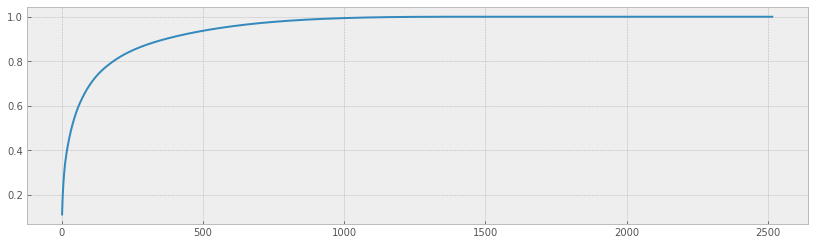

Number features: 562
Total Variance Explained: 0.9501357239553455
0.9488962007822436


In [170]:
from sklearn.decomposition import PCA
pca=PCA()
df_pca=pca.fit_transform(df_tdidf_pca)
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,df_pca.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = df_pca.shape[1] - n_over_95
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(df_pca)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])

# KMEANS

In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    #hac = AgglomerativeClustering(n_clusters=i)
    
    #hac.fit(df_pca)
    
    #cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(df_pca)
    
    cluster_assignments = k_means.predict(df_pca)
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

Max Value:
Cluster #     Cluster Score
19       0.217292

Min Value:
Cluster #    Cluster Score
2        0.13857


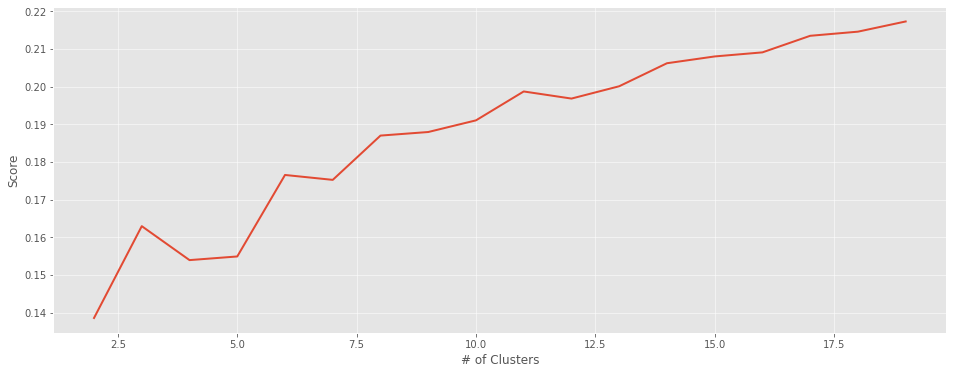

Max Value:
Cluster #    Cluster Score
5       3.328347

Min Value:
Cluster #    Cluster Score
2       1.033956


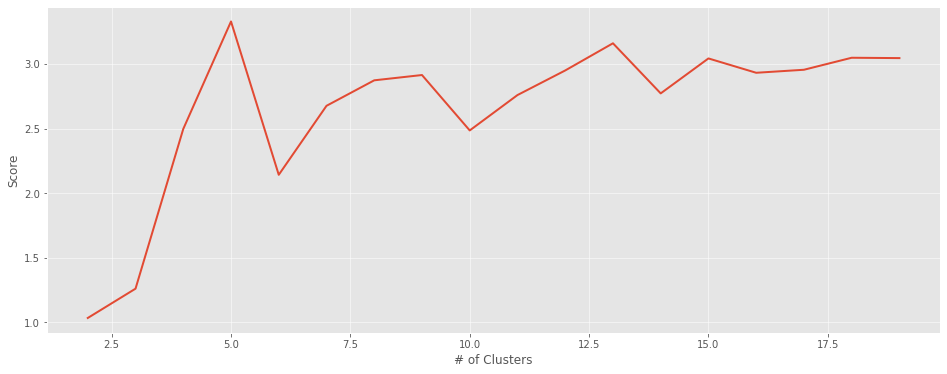

In [172]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)

# HAC (Hierarchical Agglomerative Clustering)

In [173]:
from sklearn.cluster import AgglomerativeClustering
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    #k_means = KMeans(n_clusters=i)
    
    #k_means.fit(df_pca)
    
    #cluster_assignments = k_means.predict(df_pca)
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

Max Value:
Cluster #     Cluster Score
19       0.201371

Min Value:
Cluster #    Cluster Score
2       0.138518


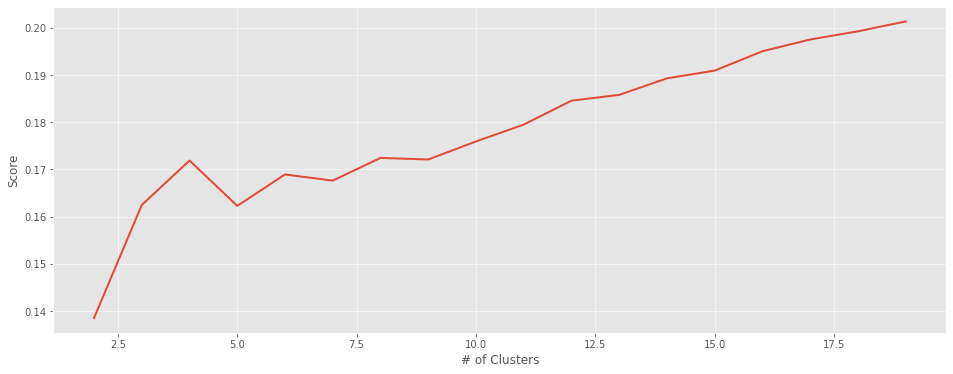

Max Value:
Cluster #     Cluster Score
17       2.923805

Min Value:
Cluster #    Cluster Score
2        0.94911


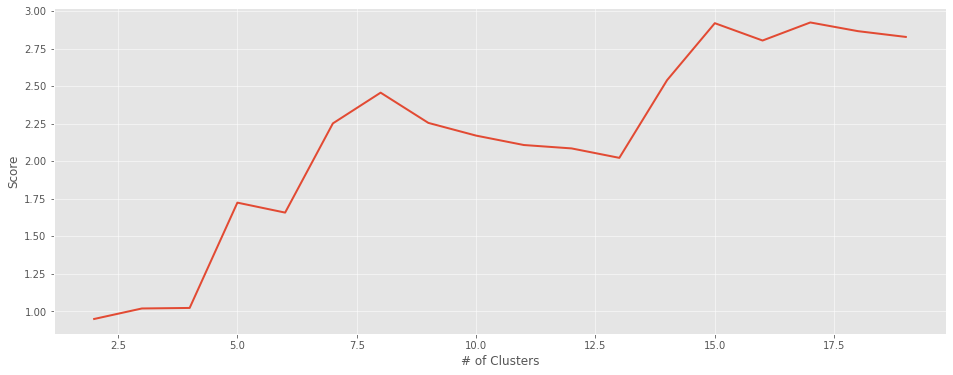

In [174]:
plot_evaluation(s_scores,cluster_cnt)
plot_evaluation(db_scores,cluster_cnt)

# PRINCE MCA ATTEMPT

In [149]:
from prince import MCA

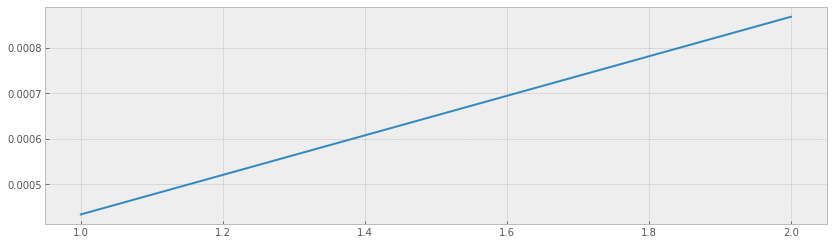

IndexError: index 2 is out of bounds for axis 0 with size 2

In [187]:
invest_key_sec_mca = invest_key_sec2.drop(columns=['index','name'])
mca=MCA()
df_mca=mca.fit_transform(invest_key_sec_mca)
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,df_mca.shape[1]+1), np.array(mca.explained_inertia_).cumsum())
plt.show()
total_explained_variance = np.array(mca.explained_inertia_).cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = df_mca.shape[1] - n_over_95
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
mca = MCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_mca = mca.fit_transform(df_mca)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(np.array(mca.explained_inertia_).cumsum()[-1])

In [176]:
invest_key_sec2

index                                        name  \
0         0            Michael Grabner Media Ges.m.b.H.   
1         1                                   10X group   
2         2                     123 Investment Managers   
3         3                                137 Ventures   
4         4                                138 Pyramids   
...     ...                                         ...   
3225   4941                        winelike invest GmbH   
3226   4944                          yabeo Capital GmbH   
3227   4945  zfhn Zukunftsfonds Heilbronn GmbH & Co. KG   
3228   4946                     zur Mühlen ApS & Co. KG   
3229   4948                         zwei.7 Holding GmbH   

                                              name_comb  
0      Verlagswesen Internet Handel Portale Suchmasc...  
1     start-ups app big data internet agnostisch Sof...  
2     tourismus altenpflege gastronomie labor senior...  
3                                           agnostisch   
4                                           agnostisch   
...                                                 ...  
3225                                        immobilien   
3226  medien software fintech pharma erneuerbare ene...  
3227  recycling iot industrie 4.0 new materials mach...  
3228  fleisch metzgerei lebensmittel & getränke Flei...  
3229  e-commerce immobilien healthcare erneuerbare e...  

[3230 rows x 3 columns]

In [192]:
invest_key_sec_mca = invest_key_sec2.drop(columns=['index','name'])
components_cnt = [i for i in range(2, 2516, 1)]
total_inertia = []
for i in components_cnt:
    mca=MCA(n_components=i, n_iter = 3, random_state = 101)
    df_mca=mca.fit_transform(invest_key_sec_mca)
    total_inertia.append(mca.explained_inertia_)

KeyboardInterrupt: 

In [189]:
lst = [0.0004340277777777782, 0.00043402777777777797]

In [191]:
np.sum(lst)

0.0008680555555555562

# FINAL CLUSTERING

In [193]:
df_tdidf_pca.columns

Index(['00', '05', '2021', '3d', '5g', 'abfall', 'abfallentsorgung',
       'abfalltransport', 'abfallverbrennung', 'abfüllen',
       ...
       'ästhetik', 'öffentlicher', 'öko', 'ökologisch', 'öl',
       'übersetzungsdienstleistungen', 'übertragung', 'übertragungssyteme',
       'überwachungssysteme', 'üwaren'],
      dtype='object', length=2516)

## WITH TFIDF,  HAC(17 CLUSTERS IS THE DEFAULT)

In [250]:
hac = AgglomerativeClustering(n_clusters=17)
hac.fit(df_pca)
cluster_assignments = hac.labels_

df_clustered = invest_key_sec2.drop('index',axis=1)
df_clustered['Cluster #'] = cluster_assignments
df_clustered

name  \
0                      Michael Grabner Media Ges.m.b.H.   
1                                             10X group   
2                               123 Investment Managers   
3                                          137 Ventures   
4                                          138 Pyramids   
5                                         17Capital LLP   
6                                       1875 Finance SA   
7                                          1955 Capital   
8                                         1confirmation   
9                              1stMOVER Management GmbH   
10                           21 Investimenti SGR S.p.A.   
11                                   21 Partners S.p.A.   
12                                 212 Capital Partners   
13                                            2C invest   
14                                      3 River Capital   
15                                360° Capital Partners   
16                                         3CC Partners   
17                                 3D Private Equity NV   
18                                 3TS Capital Partners   
19                                        3U HOLDING AG   
20                       3e Capital Group GmbH & Co. KG   
21                                             3i Group   
22                              4-tec Beteiligungs GmbH   
23                                         406 Ventures   
24                                   42CAP Manager GmbH   
25                                          4Di Capital   
26                         4K Invest International Ltd.   
27                                       4L Vision GmbH   
28                                          4c Ventures   
29                               4elements holding GmbH   
30                                         5square b.v.   
31                             7Days Group GmbH & Co KG   
32                                         7Founders AG   
33                                  7Travel (Prosieben)   
34                                          8 Miles LLP   
35                                      80twentycapital   
36                                         83North Ltd.   
37                                    A Plus Finance SA   
38                            A&V holding GmbH & Co. KG   
39                              A.P. Moller Holding A/S   
40                             AAC Benelux Holding B.V.   
41                                       AB Beteiligung   
42                        ABB Technology Ventures (ATV)   
43                                ABN AMRO Capital Ltd.   
44                                    ABRT Venture Fund   
45                                        ABRY Partners   
46                                 ABS Capital Partners   
47                                       ABÉNEX Capital   
48                            ACC Holding GmbH & Co. KG   
49                           ACCERA Venture Partners AG   
50                                     ACE & Company SA   
51                                       ACE Management   
52                                          ACI Capital   
53                               ACP Holding Digital AG   
54                          ACT Venture Capital Limited   
55           AD-PART Beteiligungen Geschäftsführungs-AG   
56                                     ADCURAM Group AG   
57                                          ADM Capital   
58                                         ADMETOS GmbH   
59                                   AEA Investors GmbH   
60                          AEM Unternehmerkapital GmbH   
61                                AEQUITA SE & Co. KGaA   
62                                 AES Industrials GmbH   
63                                    AEVIS VICTORIA SA   
64                                          AGENPA GmbH   
65          AGIC Partners GmbH-AGIC Capital -AGIC Group   
66                                       AGROFERT- a.s.   
67                                     

In [220]:
df_clustered['Cluster #'].value_counts()

2     1004
15     370
13     211
14     171
27     126
1      119
7      119
12      99
3       98
0       93
6       88
21      68
4       65
24      63
20      61
8       48
11      41
10      40
26      39
25      39
5       35
17      35
9       34
18      30
22      27
28      26
23      23
29      22
16      19
19      17
Name: Cluster #, dtype: int64

In [211]:
pd.set_option('display.max_rows', None)
df_clustered[df_clustered['Cluster #']==2]

name  \
0                      Michael Grabner Media Ges.m.b.H.   
6                                       1875 Finance SA   
8                                         1confirmation   
17                                 3D Private Equity NV   
19                                        3U HOLDING AG   
21                                             3i Group   
27                                       4L Vision GmbH   
29                               4elements holding GmbH   
30                                         5square b.v.   
32                                         7Founders AG   
37                                    A Plus Finance SA   
38                            A&V holding GmbH & Co. KG   
39                              A.P. Moller Holding A/S   
41                                       AB Beteiligung   
43                                ABN AMRO Capital Ltd.   
48                            ACC Holding GmbH & Co. KG   
50                                     ACE & Company SA   
52                                          ACI Capital   
55           AD-PART Beteiligungen Geschäftsführungs-AG   
56                                     ADCURAM Group AG   
57                                          ADM Capital   
58                                         ADMETOS GmbH   
59                                   AEA Investors GmbH   
61                                AEQUITA SE & Co. KGaA   
62                                 AES Industrials GmbH   
64                                          AGENPA GmbH   
65          AGIC Partners GmbH-AGIC Capital -AGIC Group   
66                                       AGROFERT- a.s.   
67                                           AIAC Group   
68    AIC Androsch International Management Consulti...   
71                            ALMEMA Beteiligungs GmbH    
72                 ALPHA Beratung und Beteiligungs GmbH   
73                                          ALPHA Group   
75                                       ALTWeb Capital   
77                                                  AMC   
79                                               AMVEST   
83                                      AP Capital GmbH   
85                                    AQAL Capital GmbH   
88                           ARAX Capital Partners GmbH   
89                                  ARC Financial Corp.   
90    ARCADIA Beteiligungen Bensel Tiefenbacher & Co...   
94                              ARGOS WITYU PARTNERS SA   
95                                 ARMADA Investment AG   
98                                  ARfinanz Holding AG   
99                                   AS Equity Partners   
102                                  ASTRA Holding GmbH   
103                               ASTUTIA Ventures GmbH   
104                                        ATAR Capital   
107                          AUCTUS Capital Partners AG   
109   AURELIUS Equity Opportunities SE & Co. KGaA (A...   
110                                  AURIGA Invest Gmbh   
112   AVG Capital Partners (ранее Avangard Asset Man...   
118                                   Abacus Alpha GmbH   
120                                        Abraaj Group   
121                  Abraxas Capital Management Limited   
125                                         Accel Foods   
128                                       Accel-KKR LLC   
129                                         Acceleprise   
131                                   Access Industries   
132                             Access Venture Partners   
134                           Ackermans & van Haaren NV   
138                             Acquintus Management AG   
146                       Activum SG Capital Management   
148                                        AdCapital AG   
149                          AdEPT Technology Group Plc   
154                                          Addventure   
163                                        Advisum GmbH   
165                                    

## WITH TFIDF and KMEANS

In [216]:
k_means = KMeans(n_clusters=20)
k_means.fit(df_pca)
cluster_assignments_km = k_means.predict(df_pca)
df_clustered_km = invest_key_sec2.drop('index',axis=1)
df_clustered_km['Cluster #'] = cluster_assignments_km
df_clustered_km

name  \
0                      Michael Grabner Media Ges.m.b.H.   
1                                             10X group   
2                               123 Investment Managers   
3                                          137 Ventures   
4                                          138 Pyramids   
5                                         17Capital LLP   
6                                       1875 Finance SA   
7                                          1955 Capital   
8                                         1confirmation   
9                              1stMOVER Management GmbH   
10                           21 Investimenti SGR S.p.A.   
11                                   21 Partners S.p.A.   
12                                 212 Capital Partners   
13                                            2C invest   
14                                      3 River Capital   
15                                360° Capital Partners   
16                                         3CC Partners   
17                                 3D Private Equity NV   
18                                 3TS Capital Partners   
19                                        3U HOLDING AG   
20                       3e Capital Group GmbH & Co. KG   
21                                             3i Group   
22                              4-tec Beteiligungs GmbH   
23                                         406 Ventures   
24                                   42CAP Manager GmbH   
25                                          4Di Capital   
26                         4K Invest International Ltd.   
27                                       4L Vision GmbH   
28                                          4c Ventures   
29                               4elements holding GmbH   
30                                         5square b.v.   
31                             7Days Group GmbH & Co KG   
32                                         7Founders AG   
33                                  7Travel (Prosieben)   
34                                          8 Miles LLP   
35                                      80twentycapital   
36                                         83North Ltd.   
37                                    A Plus Finance SA   
38                            A&V holding GmbH & Co. KG   
39                              A.P. Moller Holding A/S   
40                             AAC Benelux Holding B.V.   
41                                       AB Beteiligung   
42                        ABB Technology Ventures (ATV)   
43                                ABN AMRO Capital Ltd.   
44                                    ABRT Venture Fund   
45                                        ABRY Partners   
46                                 ABS Capital Partners   
47                                       ABÉNEX Capital   
48                            ACC Holding GmbH & Co. KG   
49                           ACCERA Venture Partners AG   
50                                     ACE & Company SA   
51                                       ACE Management   
52                                          ACI Capital   
53                               ACP Holding Digital AG   
54                          ACT Venture Capital Limited   
55           AD-PART Beteiligungen Geschäftsführungs-AG   
56                                     ADCURAM Group AG   
57                                          ADM Capital   
58                                         ADMETOS GmbH   
59                                   AEA Investors GmbH   
60                          AEM Unternehmerkapital GmbH   
61                                AEQUITA SE & Co. KGaA   
62                                 AES Industrials GmbH   
63                                    AEVIS VICTORIA SA   
64                                          AGENPA GmbH   
65          AGIC Partners GmbH-AGIC Capital -AGIC Group   
66                                       AGROFERT- a.s.   
67                                     

In [217]:
df_clustered_km['Cluster #'].value_counts()

11    881
2     376
17    281
0     210
7     156
14    154
5     143
19    124
4     114
9     103
3      88
6      83
13     82
12     78
18     75
10     65
8      61
15     61
1      53
16     42
Name: Cluster #, dtype: int64

In [222]:
df_clustered_km[df_clustered_km['Cluster #']==17]

name  \
16                                         3CC Partners   
19                                        3U HOLDING AG   
20                       3e Capital Group GmbH & Co. KG   
21                                             3i Group   
22                              4-tec Beteiligungs GmbH   
55           AD-PART Beteiligungen Geschäftsführungs-AG   
56                                     ADCURAM Group AG   
60                          AEM Unternehmerkapital GmbH   
65          AGIC Partners GmbH-AGIC Capital -AGIC Group   
84                                    APEX Capital GmbH   
92                                  ARDIAN Germany GmbH   
93                               ARE Beteiligungen GmbH   
94                              ARGOS WITYU PARTNERS SA   
109   AURELIUS Equity Opportunities SE & Co. KGaA (A...   
133                               Accursia Capital GmbH   
134                           Ackermans & van Haaren NV   
135                                         Acorda GmbH   
144                         Active Capital Company B.V.   
155                                 Adiuva Capital GmbH   
165                                          Aeterna AG   
175                                  Aheim Capital GmbH   
193                                     Alexander Berka   
212                                       Allistro GmbH   
244                                 American Securities   
245                                 Ammer Partners GmbH   
287                             Arcaris Management GmbH   
297                                         Arenit GmbH   
301                                          Argos GmbH   
307                       Armira Partners GmbH & Co. KG   
314                                            Artum AG   
319                                            Ascur AG   
332                            Athanor Capital Partners   
334                                       Atilla Kilinc   
350                                    Augur Capital AG   
372              Axos MidCap GmbH-Triginta Capital GmbH   
381   BE Investment-Partners GmbH / BE Beteiligungen...   
397              BPE Unternehmensbeteiligungen G.m.b.H.   
398                  BPE Unternehmensbeteiligungen GmbH   
409       BWK GmbH Unternehmensbeteiligungsgesellschaft   
434                         Bavaria Industries Group AG   
439       BayBG Bayerische Beteiligungsgesellschaft mbH   
451                                   Belana Capital AG   
454                        Bencis Capital Partners GmbH   
455   Benedict Wollschlaeger Beteiligungs GmbH (vorh...   
456   Benedikt Scheffer / Quercus Mittelstandsnachfo...   
481                        Beyond Capital Partners GmbH   
497                                        Björn Klocke   
509                                         Blue Cap AG   
576                CAPCELLENCE Mittelstandspartner GmbH   
581                             CARISTO Management GmbH   
585    CBG Commerz Beteiligungsgesellschaft Holding mbH   
592                            CE Capital Partners GmbH   
596                                   CGS Management AG   
601                                       CITIC Limited   
602                                          CITTTIC AG   
607                CMP Capital Management-Partners GmbH   
611                                CORE Industries GmbH   
615                               CPD NACHFOLGE PARTNER   
620                               CRRC Greenway PE fund   
628                    CWM Beteiligungsgesellschaft mbH   
638               Callista Private Equity GmbH & Co. KG   
641                                     Canerector Inc.   
659                                           Capvis AG   
667                                   Carus Invest GmbH   
669                             Castik Capital S.à r.l.   
672                                      Cathay Capital   
682                                  Certina Holding AG   
684       Change Capital GmbH / Value I

## WITH COUNT VECTORIZER

In [226]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cv = CountVectorizer()
x = vectorizer_cv.fit_transform(invest_key_sec2['name_comb'])

df_wrds_cv = pd.DataFrame(x.toarray(), columns=vectorizer_cv.get_feature_names_out())

# Concating the words DF with the original DF
df_cv = pd.concat([invest_key_sec2, df_wrds_cv], axis=1)

# Dropping name_comb because it is no longer needed in place of vectorization
df_cv.drop(['name_comb','index'], axis=1, inplace=True)
df_cv1 = df_cv.drop('name',axis=1)

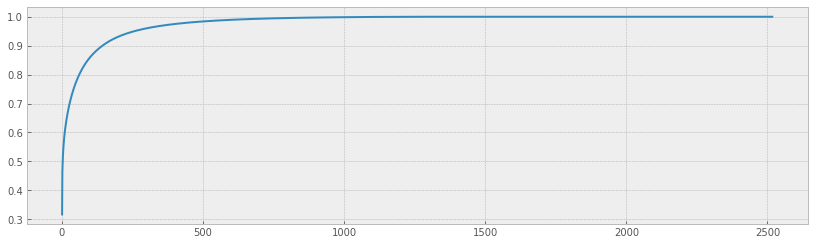

Number features: 256
Total Variance Explained: 0.9501196216405671
0.896633700781593


In [227]:
pca_cv=PCA()
df_pca_cv = pca_cv.fit_transform(df_cv1)
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,df_pca_cv.shape[1]+1), pca_cv.explained_variance_ratio_.cumsum())
plt.show()
total_explained_variance = pca_cv.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = df_pca_cv.shape[1] - n_over_95
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca_cv = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca_cv = pca_cv.fit_transform(df_pca)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca_cv.explained_variance_ratio_.cumsum()[-1])

### Kmeans

Max Value:
Cluster #     Cluster Score
18       0.228514

Min Value:
Cluster #    Cluster Score
5       0.155947


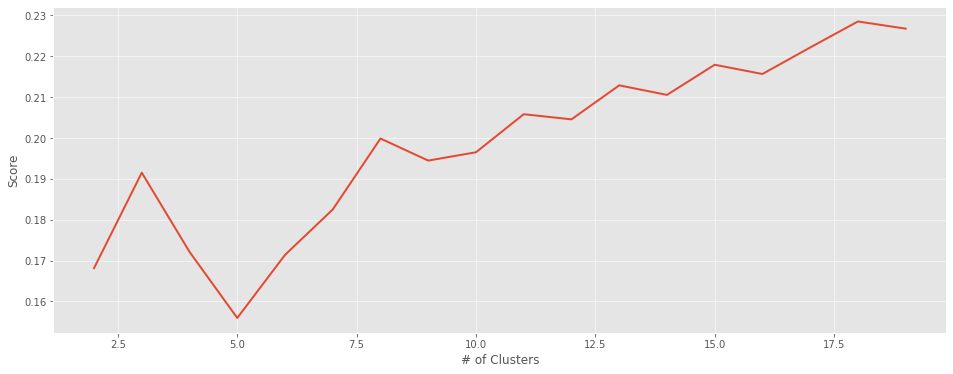

Max Value:
Cluster #    Cluster Score
5       3.276998

Min Value:
Cluster #    Cluster Score
2       0.968026


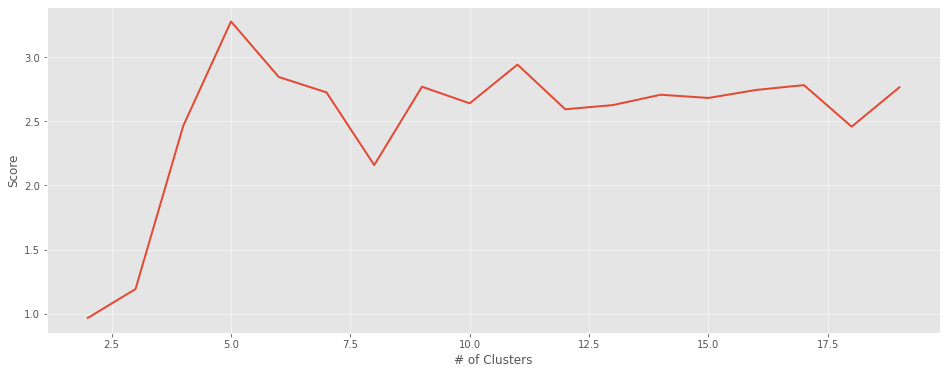

In [229]:
cluster_cv_km = [i for i in range(2, 20, 1)]

s_scores_cv_km = []

db_scores_cv_km = []

for i in cluster_cv_km:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    #hac = AgglomerativeClustering(n_clusters=i)
    
    #hac.fit(df_pca)
    
    #cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    k_means_cv = KMeans(n_clusters=i)
    
    k_means_cv.fit(df_pca_cv)
    
    cluster_assignments_cv_km = k_means_cv.predict(df_pca_cv)
    
    # Appending the scores to the empty lists    
    s_scores_cv_km.append(silhouette_score(df_pca_cv, cluster_assignments_cv_km))
    
    db_scores_cv_km.append(davies_bouldin_score(df_pca_cv, cluster_assignments_cv_km))
    
plot_evaluation(s_scores_cv_km,cluster_cv_km)
plot_evaluation(db_scores_cv_km,cluster_cv_km)

### HAC

Max Value:
Cluster #     Cluster Score
19       0.216389

Min Value:
Cluster #    Cluster Score
2       0.168322


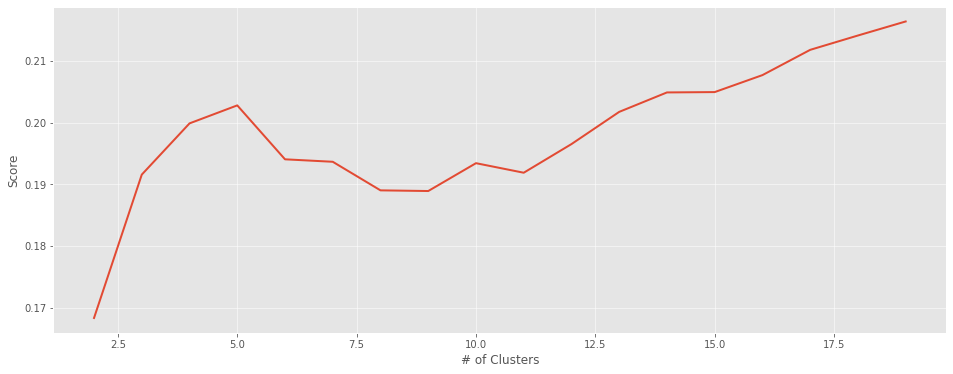

Max Value:
Cluster #     Cluster Score
16        2.88342

Min Value:
Cluster #    Cluster Score
2       0.885049


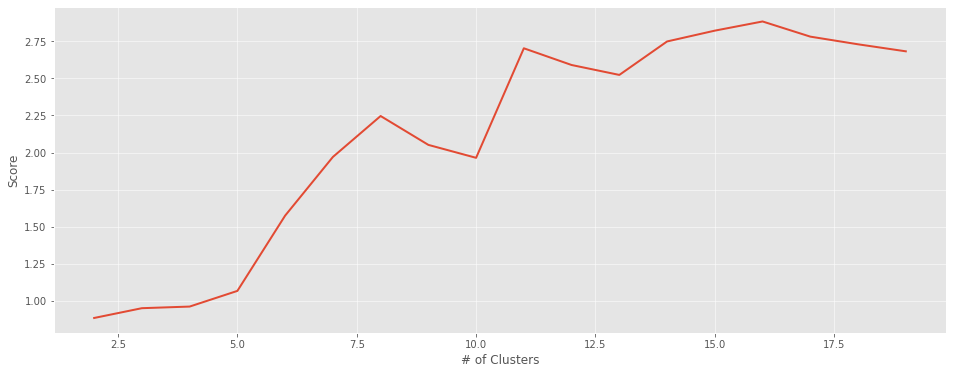

In [233]:
cluster_cv_hac = [i for i in range(2, 20, 1)]

s_scores_cv_hac = []

db_scores_cv_hac = []

for i in cluster_cv_hac:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac_cv = AgglomerativeClustering(n_clusters=i)
    
    hac_cv.fit(df_pca_cv)
    
    cluster_assignments_cv_hac = hac_cv.labels_
    
    ## KMeans Clustering with different number of clusters
    #k_means_cv = KMeans(n_clusters=i)
    
    #k_means_cv.fit(df_pca_cv)
    
    #cluster_assignments_cv_km = k_means_cv.predict(df_pca_cv)
    
    # Appending the scores to the empty lists    
    s_scores_cv_hac.append(silhouette_score(df_pca_cv, cluster_assignments_cv_hac))
    
    db_scores_cv_hac.append(davies_bouldin_score(df_pca_cv, cluster_assignments_cv_hac))
    
plot_evaluation(s_scores_cv_hac,cluster_cv_hac)
plot_evaluation(db_scores_cv_hac,cluster_cv_hac)

## WITH CV, HAC=16

In [237]:
invest_key_sec2.drop('Cluster #',axis=1,inplace=True)

In [243]:
hac_cv = AgglomerativeClustering(n_clusters=16)
hac_cv.fit(df_pca_cv)
cluster_assignments_cv_hac = hac_cv.labels_

df_clustered_cv_hac = invest_key_sec2.drop('index',axis=1)
df_clustered_cv_hac['Cluster_#'] = cluster_assignments_cv_hac
df_clustered_cv_hac

name  \
0                      Michael Grabner Media Ges.m.b.H.   
1                                             10X group   
2                               123 Investment Managers   
3                                          137 Ventures   
4                                          138 Pyramids   
5                                         17Capital LLP   
6                                       1875 Finance SA   
7                                          1955 Capital   
8                                         1confirmation   
9                              1stMOVER Management GmbH   
10                           21 Investimenti SGR S.p.A.   
11                                   21 Partners S.p.A.   
12                                 212 Capital Partners   
13                                            2C invest   
14                                      3 River Capital   
15                                360° Capital Partners   
16                                         3CC Partners   
17                                 3D Private Equity NV   
18                                 3TS Capital Partners   
19                                        3U HOLDING AG   
20                       3e Capital Group GmbH & Co. KG   
21                                             3i Group   
22                              4-tec Beteiligungs GmbH   
23                                         406 Ventures   
24                                   42CAP Manager GmbH   
25                                          4Di Capital   
26                         4K Invest International Ltd.   
27                                       4L Vision GmbH   
28                                          4c Ventures   
29                               4elements holding GmbH   
30                                         5square b.v.   
31                             7Days Group GmbH & Co KG   
32                                         7Founders AG   
33                                  7Travel (Prosieben)   
34                                          8 Miles LLP   
35                                      80twentycapital   
36                                         83North Ltd.   
37                                    A Plus Finance SA   
38                            A&V holding GmbH & Co. KG   
39                              A.P. Moller Holding A/S   
40                             AAC Benelux Holding B.V.   
41                                       AB Beteiligung   
42                        ABB Technology Ventures (ATV)   
43                                ABN AMRO Capital Ltd.   
44                                    ABRT Venture Fund   
45                                        ABRY Partners   
46                                 ABS Capital Partners   
47                                       ABÉNEX Capital   
48                            ACC Holding GmbH & Co. KG   
49                           ACCERA Venture Partners AG   
50                                     ACE & Company SA   
51                                       ACE Management   
52                                          ACI Capital   
53                               ACP Holding Digital AG   
54                          ACT Venture Capital Limited   
55           AD-PART Beteiligungen Geschäftsführungs-AG   
56                                     ADCURAM Group AG   
57                                          ADM Capital   
58                                         ADMETOS GmbH   
59                                   AEA Investors GmbH   
60                          AEM Unternehmerkapital GmbH   
61                                AEQUITA SE & Co. KGaA   
62                                 AES Industrials GmbH   
63                                    AEVIS VICTORIA SA   
64                                          AGENPA GmbH   
65          AGIC Partners GmbH-AGIC Capital -AGIC Group   
66                                       AGROFERT- a.s.   
67                                     

In [244]:
df_clustered_cv_hac['Cluster_#'].value_counts()

0     970
4     562
15    370
6     287
1     190
12    126
3     120
13    120
2      99
14     96
7      63
9      62
10     60
5      38
11     34
8      33
Name: Cluster_#, dtype: int64

In [249]:
df_clustered_cv_hac[df_clustered_cv_hac['Cluster_#']==6]

name  \
0                      Michael Grabner Media Ges.m.b.H.   
1                                             10X group   
9                              1stMOVER Management GmbH   
23                                         406 Ventures   
24                                   42CAP Manager GmbH   
31                             7Days Group GmbH & Co KG   
33                                  7Travel (Prosieben)   
36                                         83North Ltd.   
42                        ABB Technology Ventures (ATV)   
44                                    ABRT Venture Fund   
45                                        ABRY Partners   
54                          ACT Venture Capital Limited   
71                            ALMEMA Beteiligungs GmbH    
74                                   ALSTIN Family GmbH   
86                                             AQTON SE   
101                                 ASC Investment Sarl   
111                                        AV8 Ventures   
115                                AXA Venture Partners   
143                                    Activant Capital   
145                             Active Venture Partners   
153                                        Add Partners   
171                                      Aglae Ventures   
177                           Ahren Innovation Capital    
232                       Altpoint Capital Partners LLC   
234                                         Alugha GmbH   
235                           Alven Capital Partners SA   
236                           Alveus Beteiligungen GmbH   
239                    Amadeus Capital Partners Limited   
269                                    Anya Capital Srl   
270             Apax Partners Beteiligungsberatung GmbH   
286                                        Arca Capital   
315                                     Arturo Vidaurre   
318                      Aschendorff NEXT GmbH & Co. KG   
320                      Asgard Capital Verwaltung GmbH   
340                                       Atlantic Labs   
370                                      Avnet Ventures   
372              Axos MidCap GmbH-Triginta Capital GmbH   
380                                   BD Brothers Group   
382                BELLEVUE Investments GmbH & Co. KGaA   
389                                     BID Equity GmbH   
401                           BPO Capital GmbH & Co. KG   
414                                  Baigo Capital GmbH   
418                                   Balderton Capital   
422                             Bamboo Capital Partners   
426                         Barclays UK Ventures (BUKV)   
432                               Battery Ventures (BV)   
443               BeWo Beratungs- und Beteiligungs GmbH   
454                        Bencis Capital Partners GmbH   
465                                        Beringea LLP   
473          Bertelsmann Digital Media Investments Inc.   
502                          Black River Ventures - BRV   
507                                      Blink Holdings   
524       Boerse Stuttgart Digital Ventures GmbH - bsdv   
529                                            Boost VC   
535                            BrainWeb Investment GmbH   
552                              Bright Capital Digital   
573                                       CAIXA CAPITAL   
643                             Cannonball Capital GmbH   
646                                      CapHorn Invest   
664                                     Carmel Ventures   
675                                 Celeres Investments   
687                                    Check24 Ventures   
705                                       Citi Ventures   
715                                     Cloud X Markets   
723                                 Colony Capital, LLC   
724                              Columbia Lake Partners   
728                               Commerz Ventures GmbH   
734                              ConVis